In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('matches.csv')

In [13]:
print(df.info())  # Get data types and missing values
print(df.head())  # Preview the first few rows
print(df.describe())  # Summary statistics for numerical columns
print(df.columns)  # Column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## Data loading


In [14]:
import pandas as pd

df = pd.read_csv('matches.csv')
display(df.head())
print(df.shape)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


(756, 18)


## Data cleaning



In [15]:
# Handle missing values
# Fill missing values in 'city', 'umpire3' with the mode.
# 'umpire3' has many missing values. Impute with mode
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['umpire3'].fillna(df['umpire3'].mode()[0], inplace=True)

# Remove duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
df.drop_duplicates(inplace=True)

# Detect and handle outliers
# Focus on numerical columns 'win_by_runs' and 'win_by_wickets'
numerical_cols = ['win_by_runs', 'win_by_wickets']

# Using IQR method to detect outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Standardize categorical values
# Convert 'toss_decision' to numerical representation (field: 0, bat: 1)
df['toss_decision'] = df['toss_decision'].map({'field': 0, 'bat': 1})

# Check for typos and inconsistencies in team names
print("Unique team names:", df['team1'].unique())

display(df.head())

Number of duplicate rows: 0
Unique team names: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


C:\Users\thiru\AppData\Local\Temp\ipykernel_13280\3050836710.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city'].fillna(df['city'].mode()[0], inplace=True)
C:\Users\thiru\AppData\Local\Temp\ipykernel_13280\3050836710.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,0,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,C Shamshuddin
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,0,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,C Shamshuddin
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,0,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,C Shamshuddin
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,0,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,1,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,C Shamshuddin


## Data exploration



In [16]:
# Examine data types
print(df.dtypes)

# Descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print(df[numerical_cols].describe())

# Explore categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

# Check DataFrame shape
print(f"\nDataFrame shape: {df.shape}")

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision       int64
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object
                 id       season  toss_decision  dl_applied  win_by_runs  \
count    698.000000   698.000000     698.000000  698.000000   698.000000   
mean    1841.388252  2013.482808       0.388252    0.025788     7.812321   
std     3515.398737     3.377343       0.487702    0.158616    12.405650   
min        1.000000  2008.000000       0.000000    0.000000     0.000000   
25%      193.250000  2011.000000       0.000000    0.000000     0.000000   
50%      381.500000  2013.000000       0.000000    0.000000   

## Data analysis


            season  win_by_runs  win_by_wickets  dl_applied  toss_decision
count   698.000000   698.000000      698.000000  698.000000     698.000000
mean   2013.482808     7.812321        3.628940    0.025788       0.388252
std       3.377343    12.405650        3.379594    0.158616       0.487702
min    2008.000000     0.000000        0.000000    0.000000       0.000000
25%    2011.000000     0.000000        0.000000    0.000000       0.000000
50%    2013.000000     0.000000        4.000000    0.000000       0.000000
75%    2016.000000    13.750000        7.000000    0.000000       1.000000
max    2019.000000    47.000000       10.000000    1.000000       1.000000


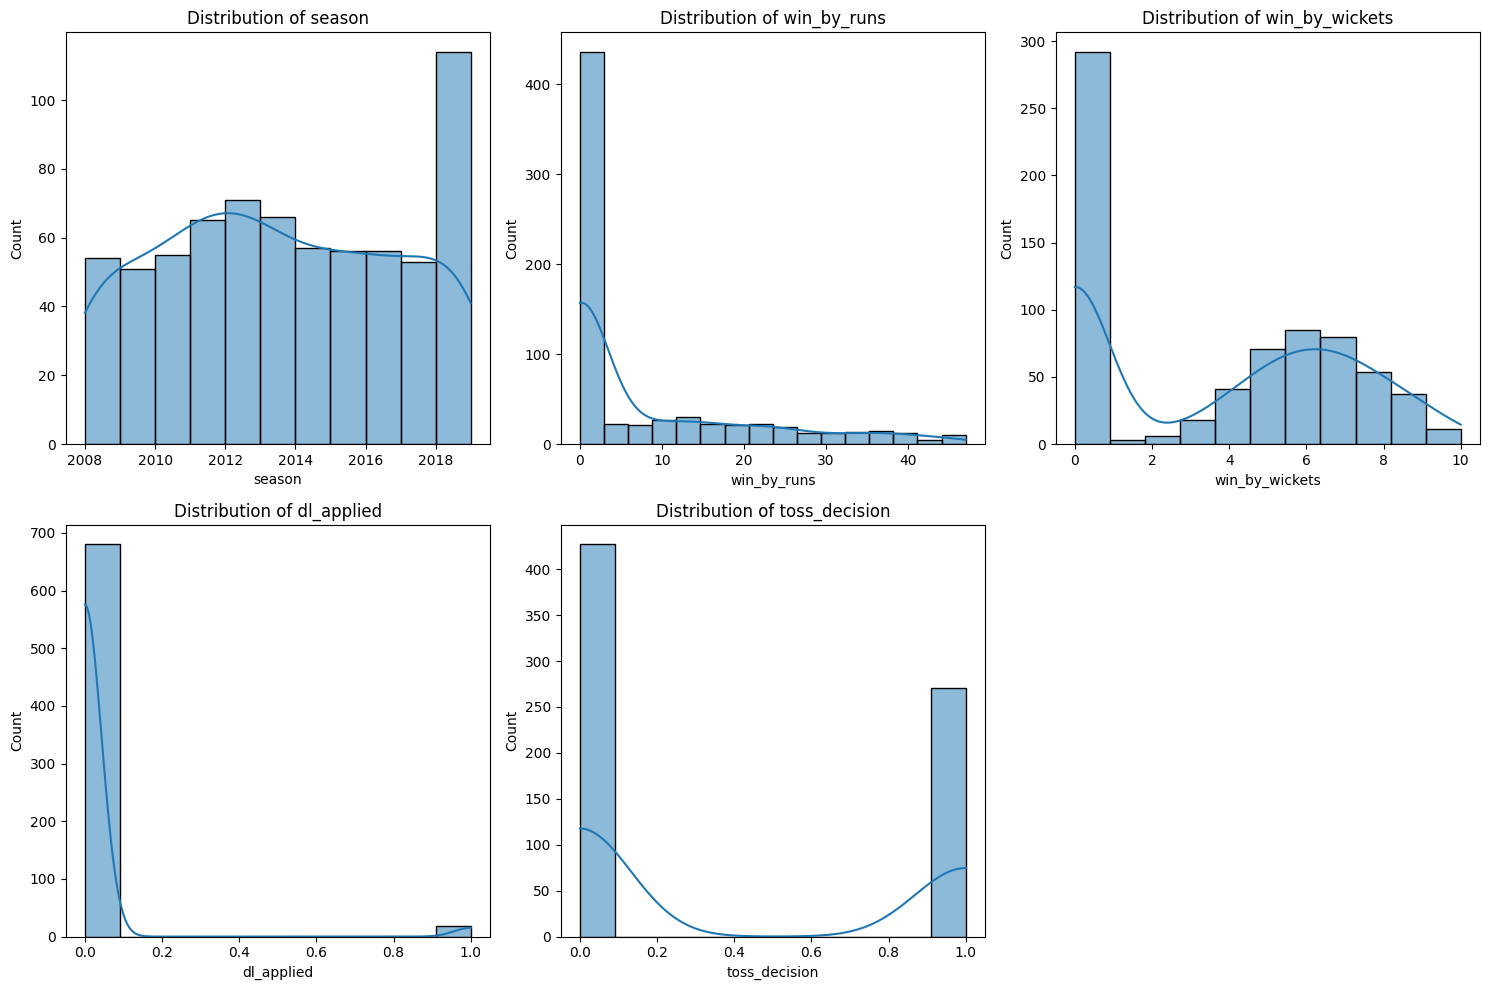

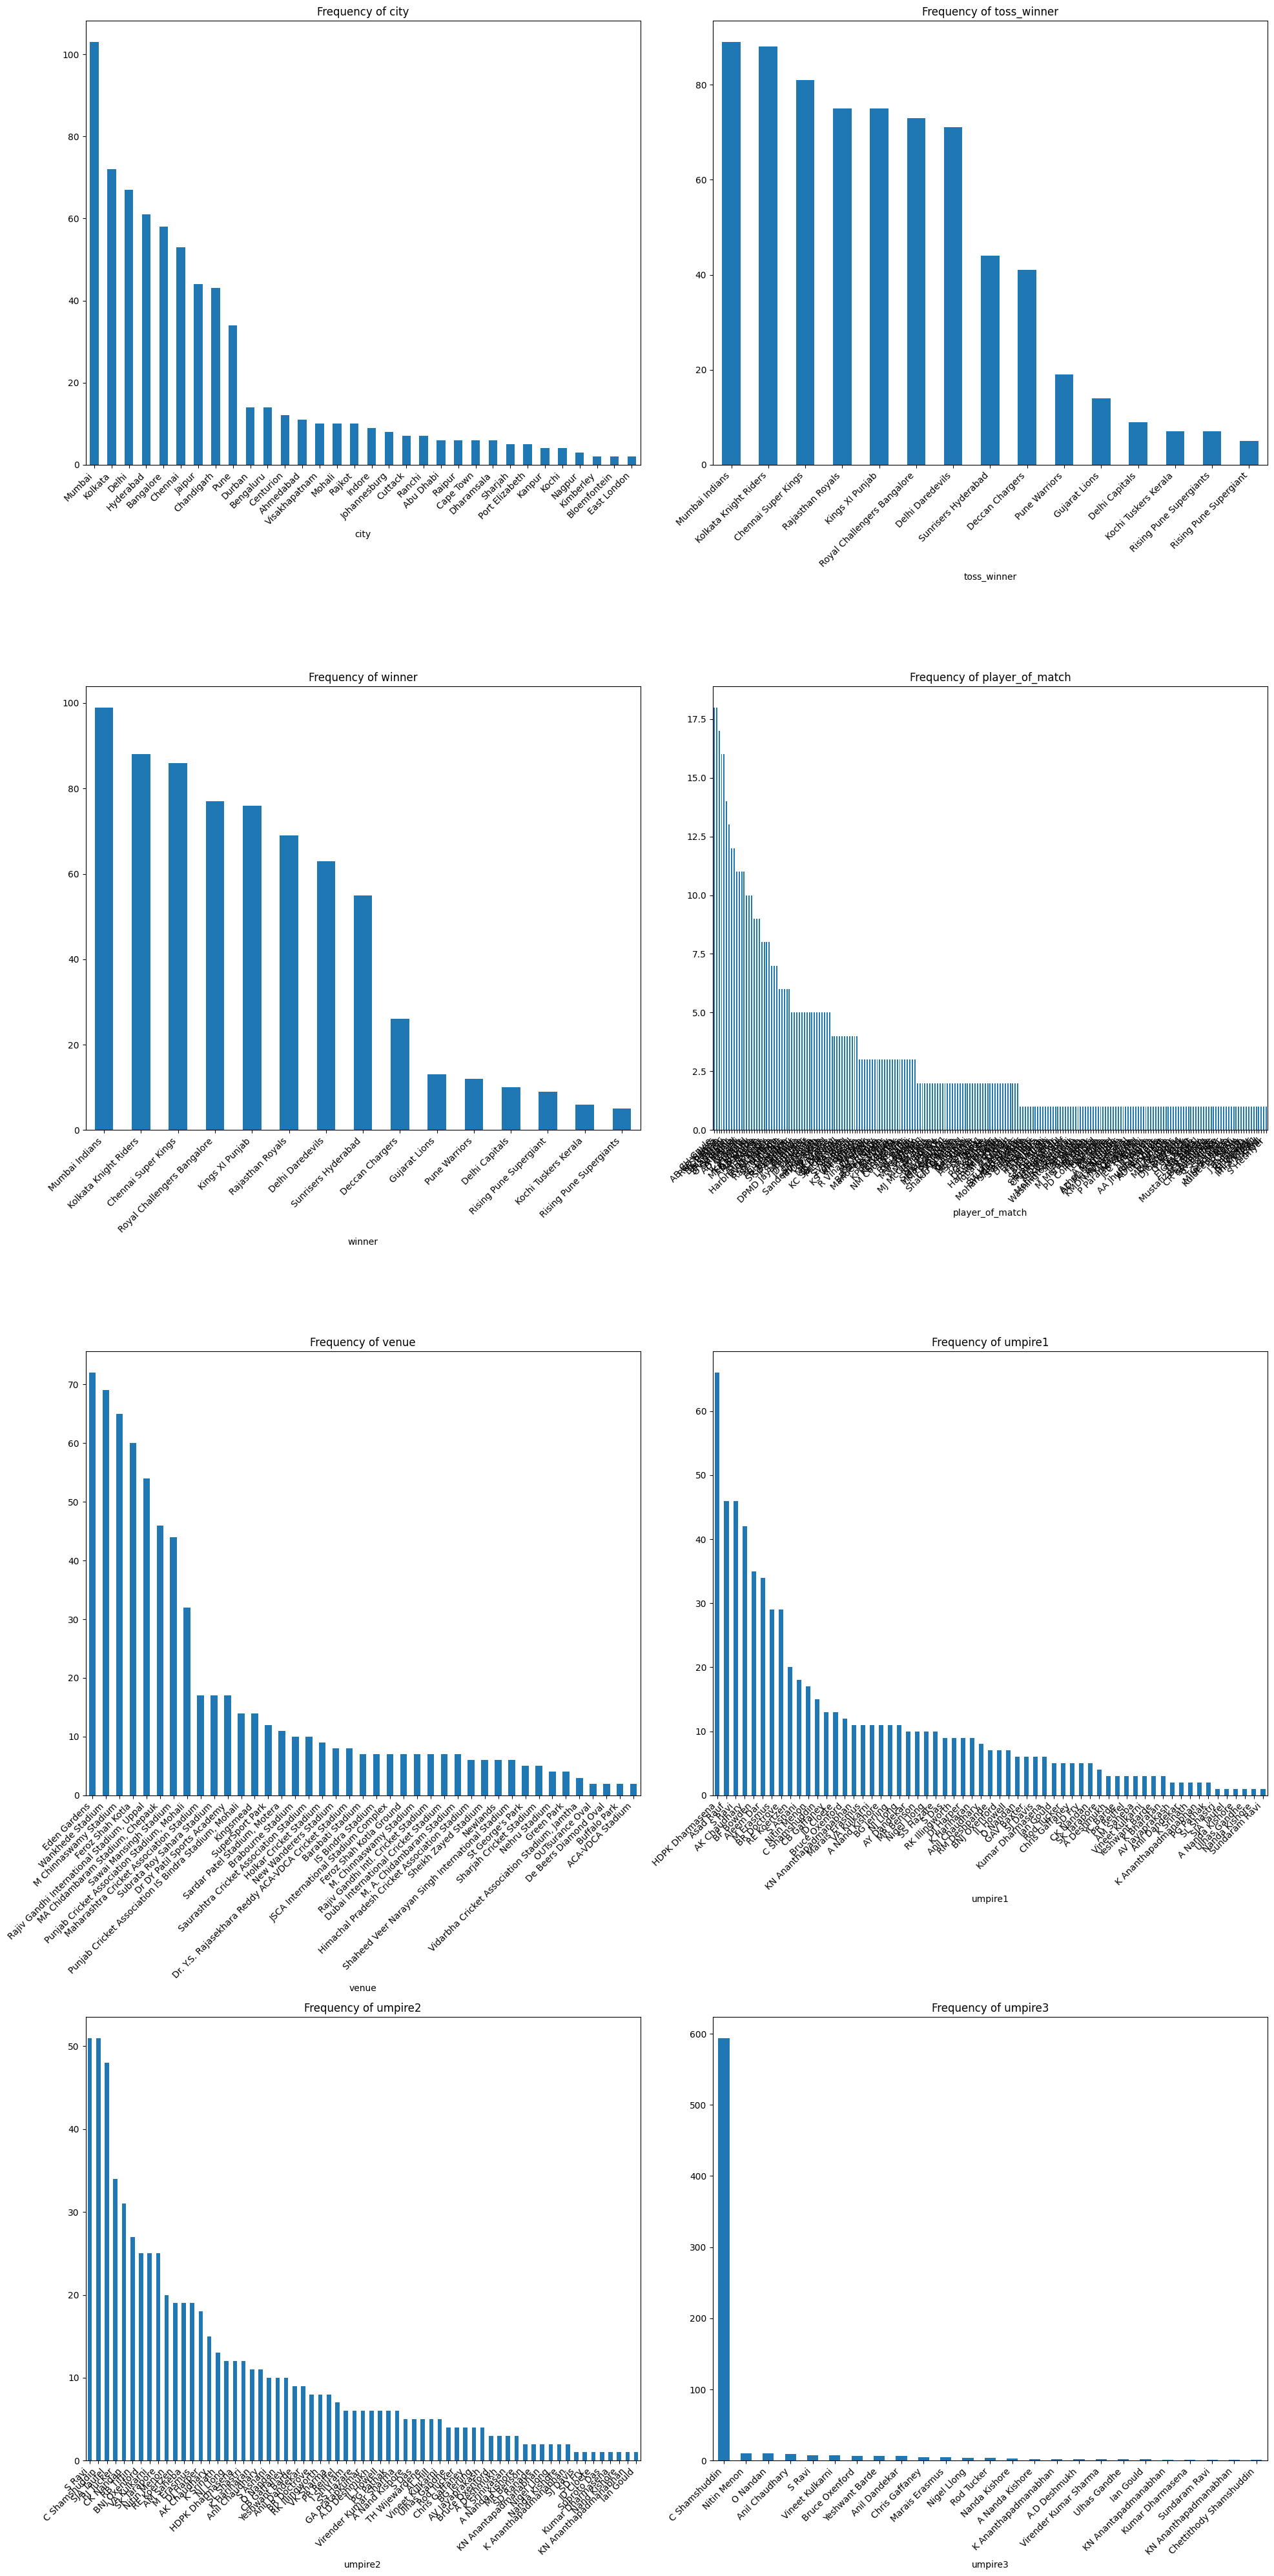

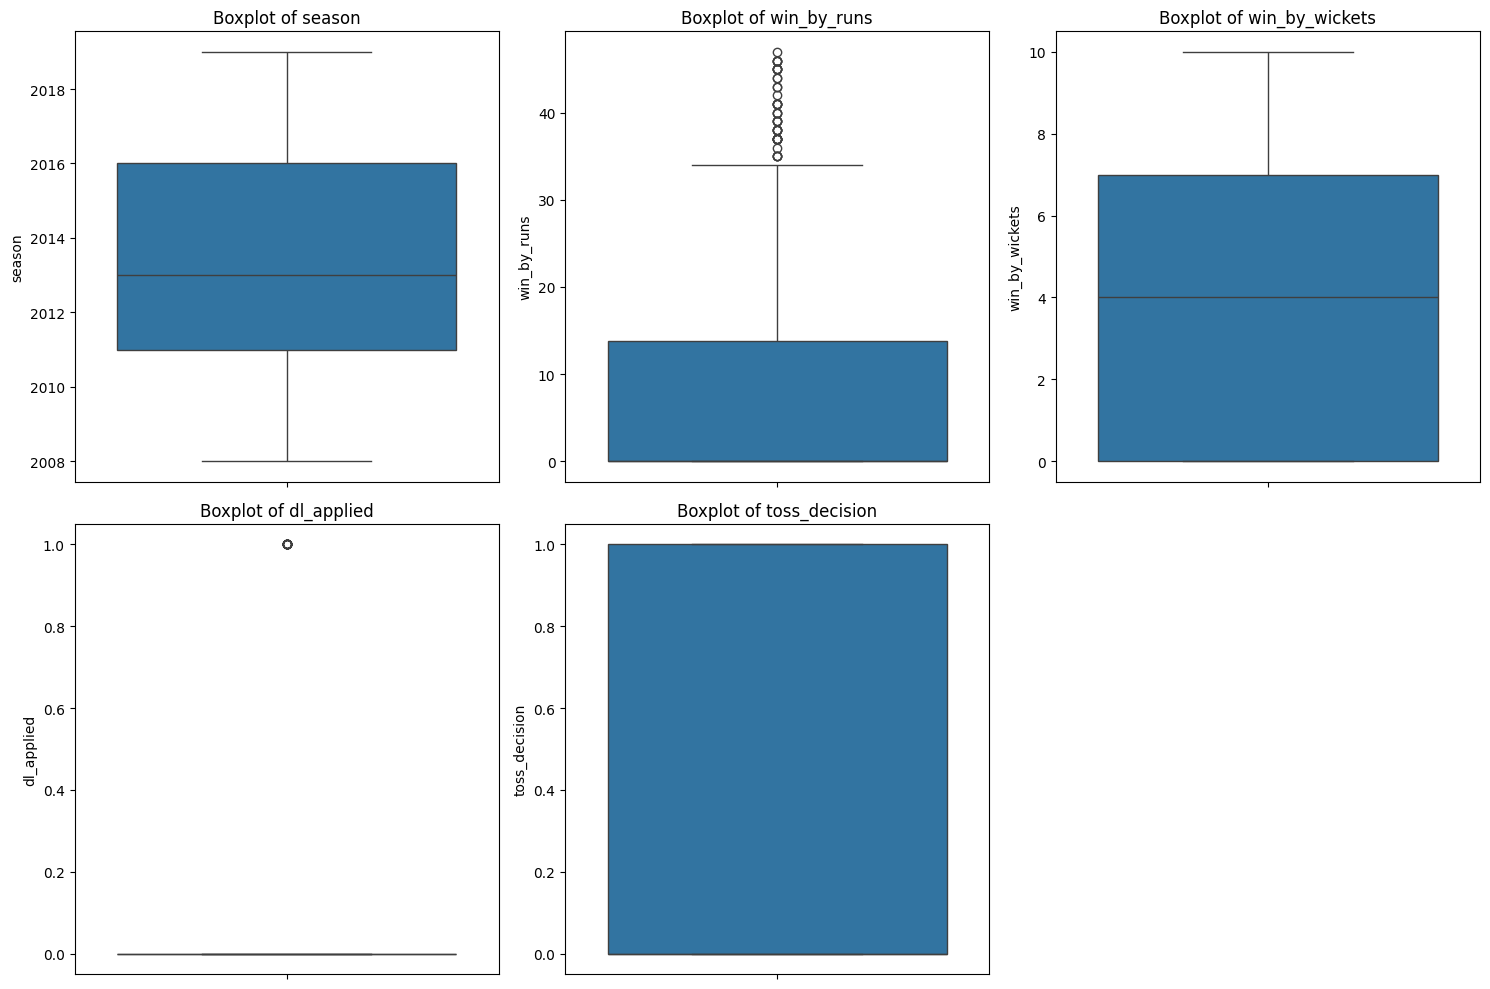

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate summary statistics for numerical features
numerical_cols = ['season', 'win_by_runs', 'win_by_wickets', 'dl_applied', 'toss_decision']
print(df[numerical_cols].describe())

# Create histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Create bar plots for categorical features
categorical_cols = ['city', 'toss_winner', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']
plt.figure(figsize=(20, 40))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Create box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Data analysis




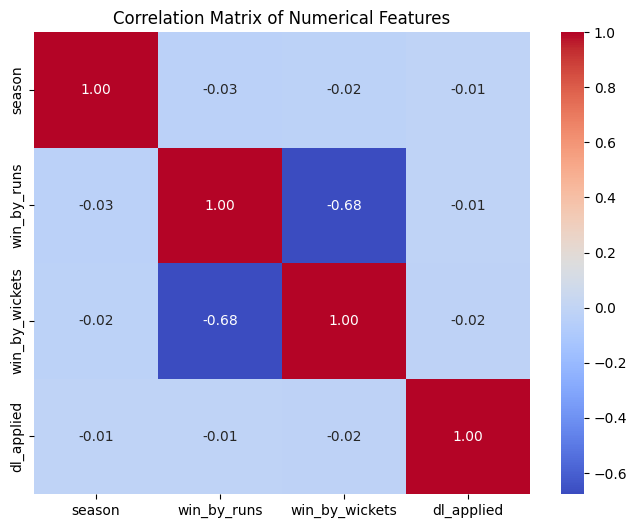

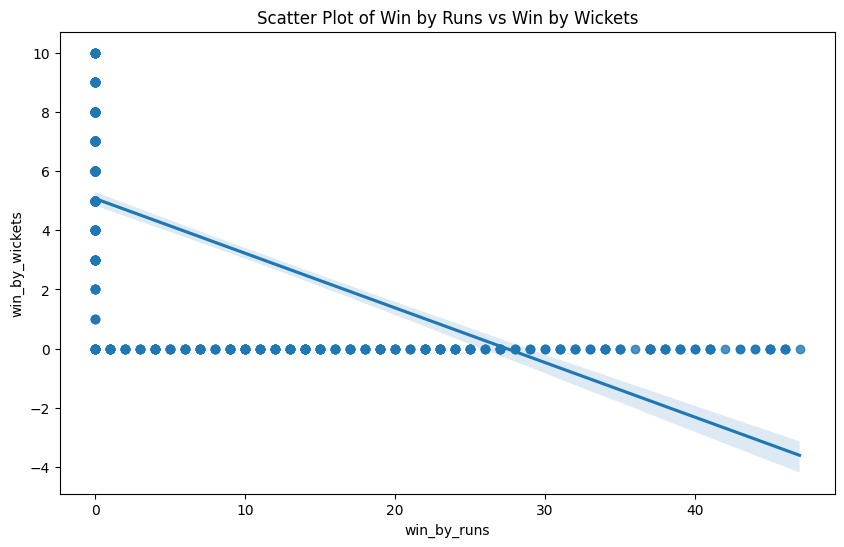

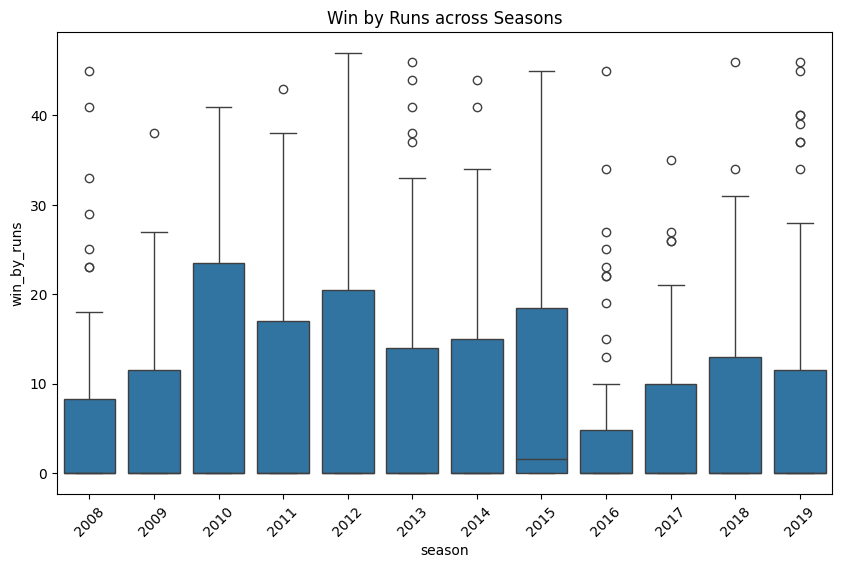

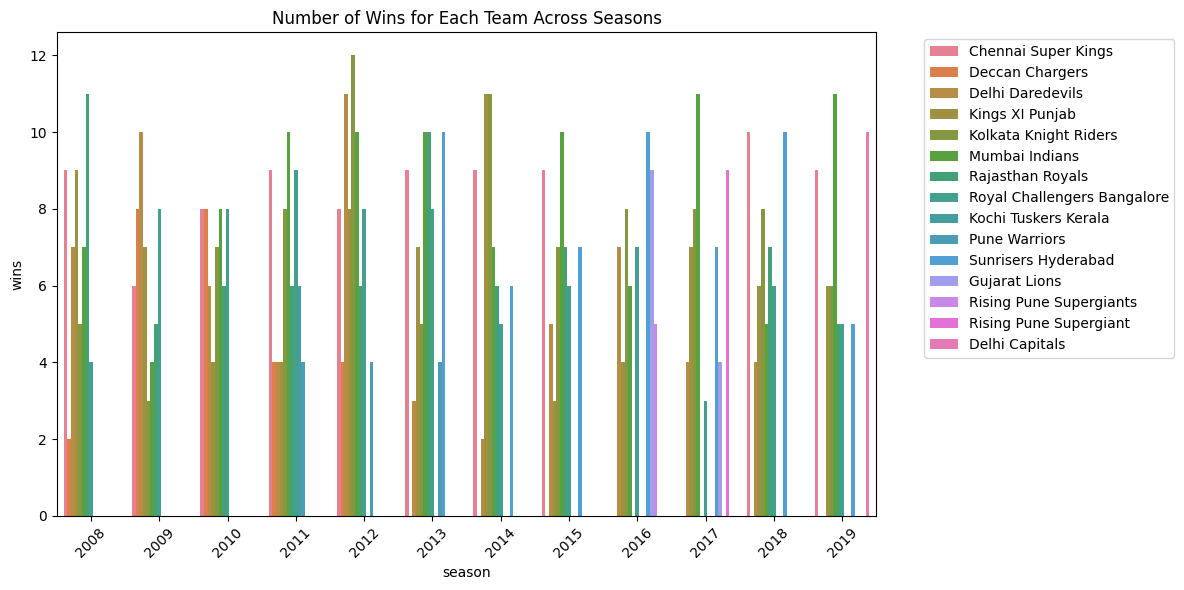

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical features
numerical_cols = ['season', 'win_by_runs', 'win_by_wickets', 'dl_applied']
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Create scatter plots for pairs of numerical features with notable correlation
plt.figure(figsize=(10, 6))
sns.regplot(x='win_by_runs', y='win_by_wickets', data=df)
plt.title('Scatter Plot of Win by Runs vs Win by Wickets')
plt.show()


# Create box plots to compare numerical features across different seasons
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='win_by_runs', data=df)
plt.title('Win by Runs across Seasons')
plt.xticks(rotation=45)
plt.show()

# Create bar plots to compare the number of wins for each team across different seasons
team_wins_by_season = df.groupby(['season', 'winner'])['id'].count().reset_index(name='wins')
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='wins', hue='winner', data=team_wins_by_season)
plt.title('Number of Wins for Each Team Across Seasons')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Data analysis




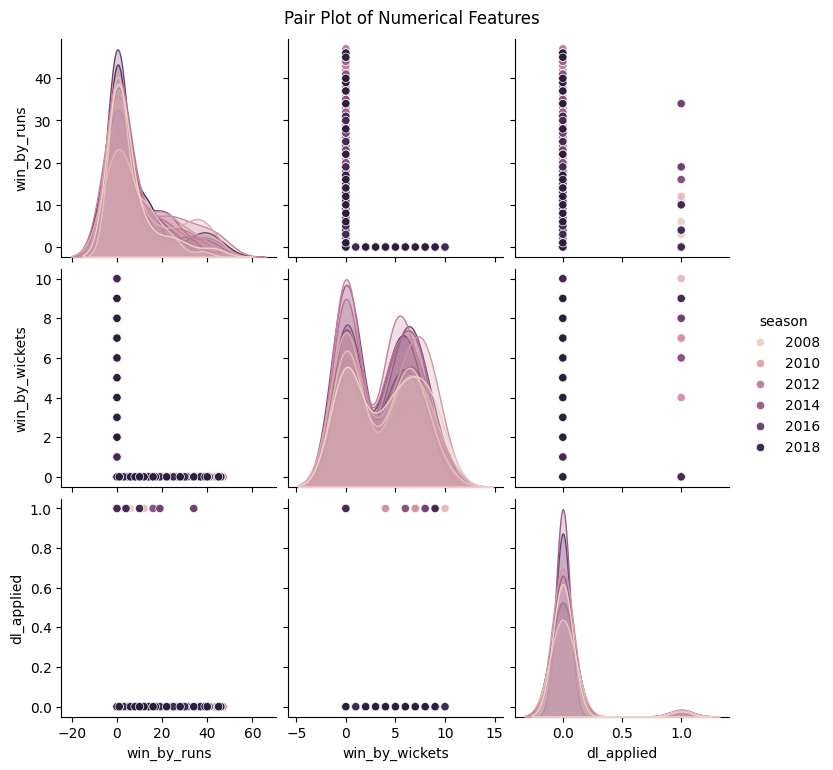

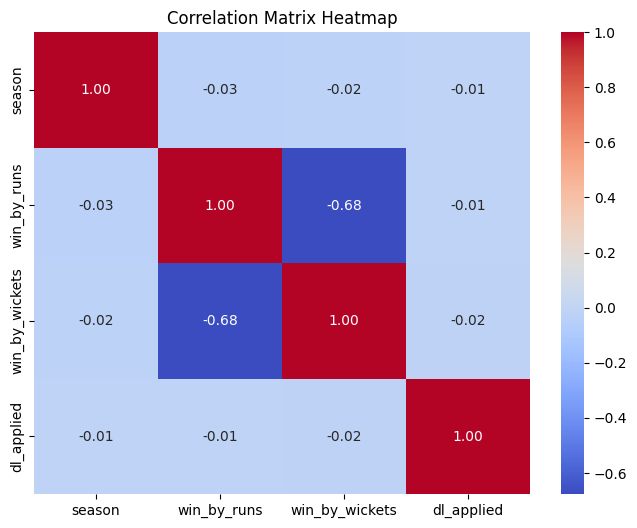

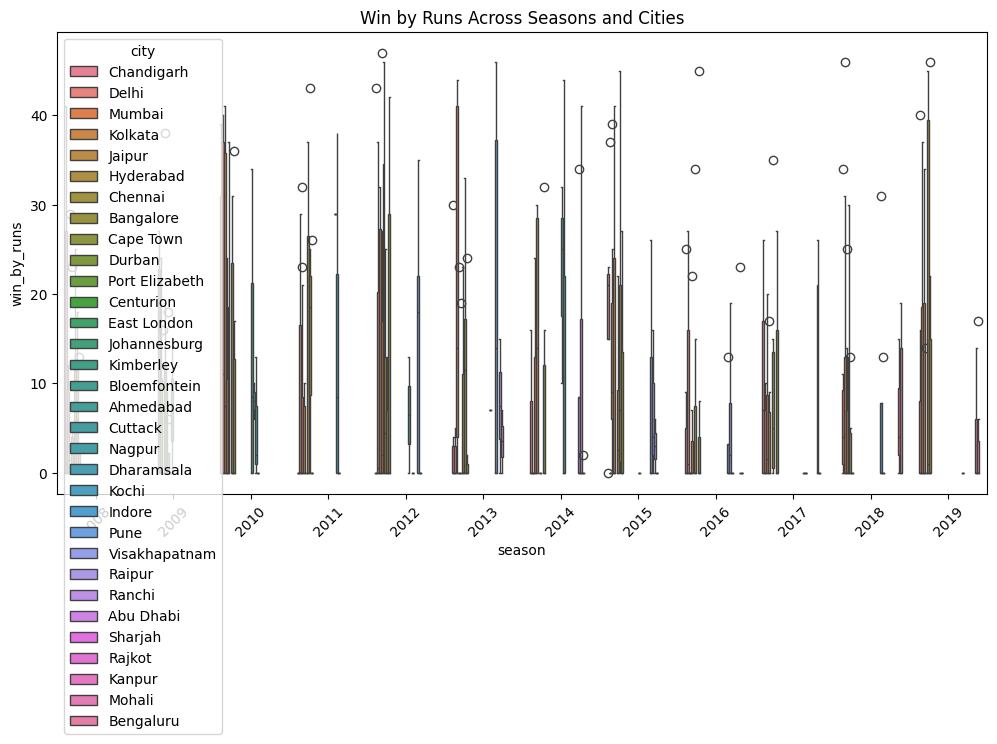

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pair plot
numerical_cols = ['season', 'win_by_runs', 'win_by_wickets', 'dl_applied']
sns.pairplot(df[numerical_cols], hue='season')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Grouped comparisons
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='win_by_runs', hue='city', data=df)
plt.title('Win by Runs Across Seasons and Cities')
plt.xticks(rotation=45)
plt.show()

## Data visualization



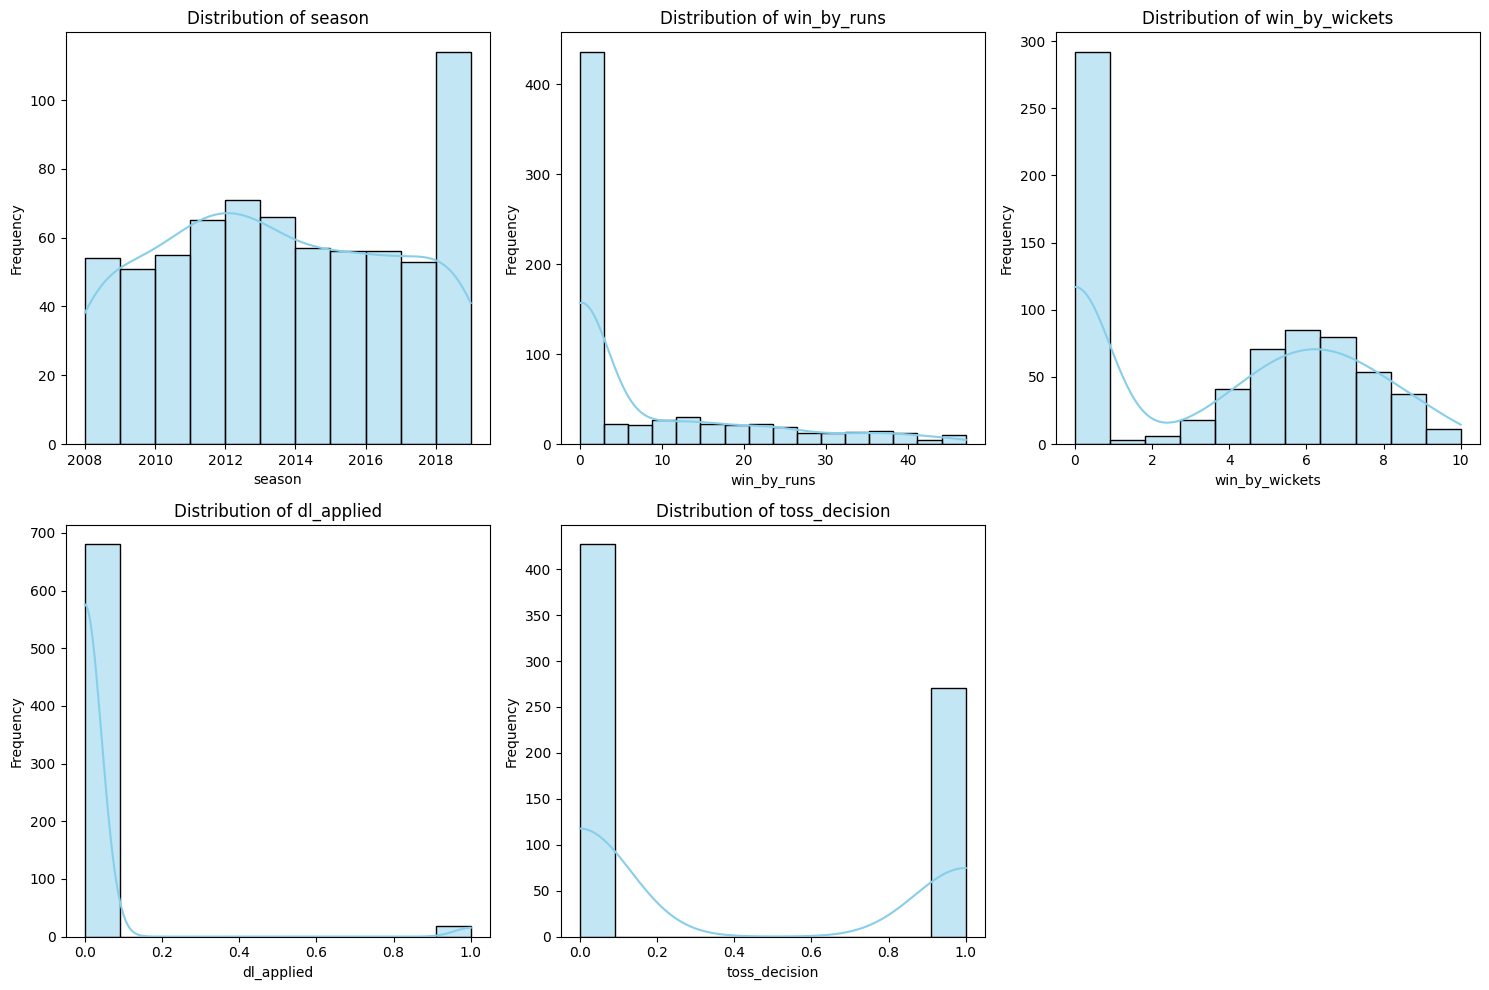

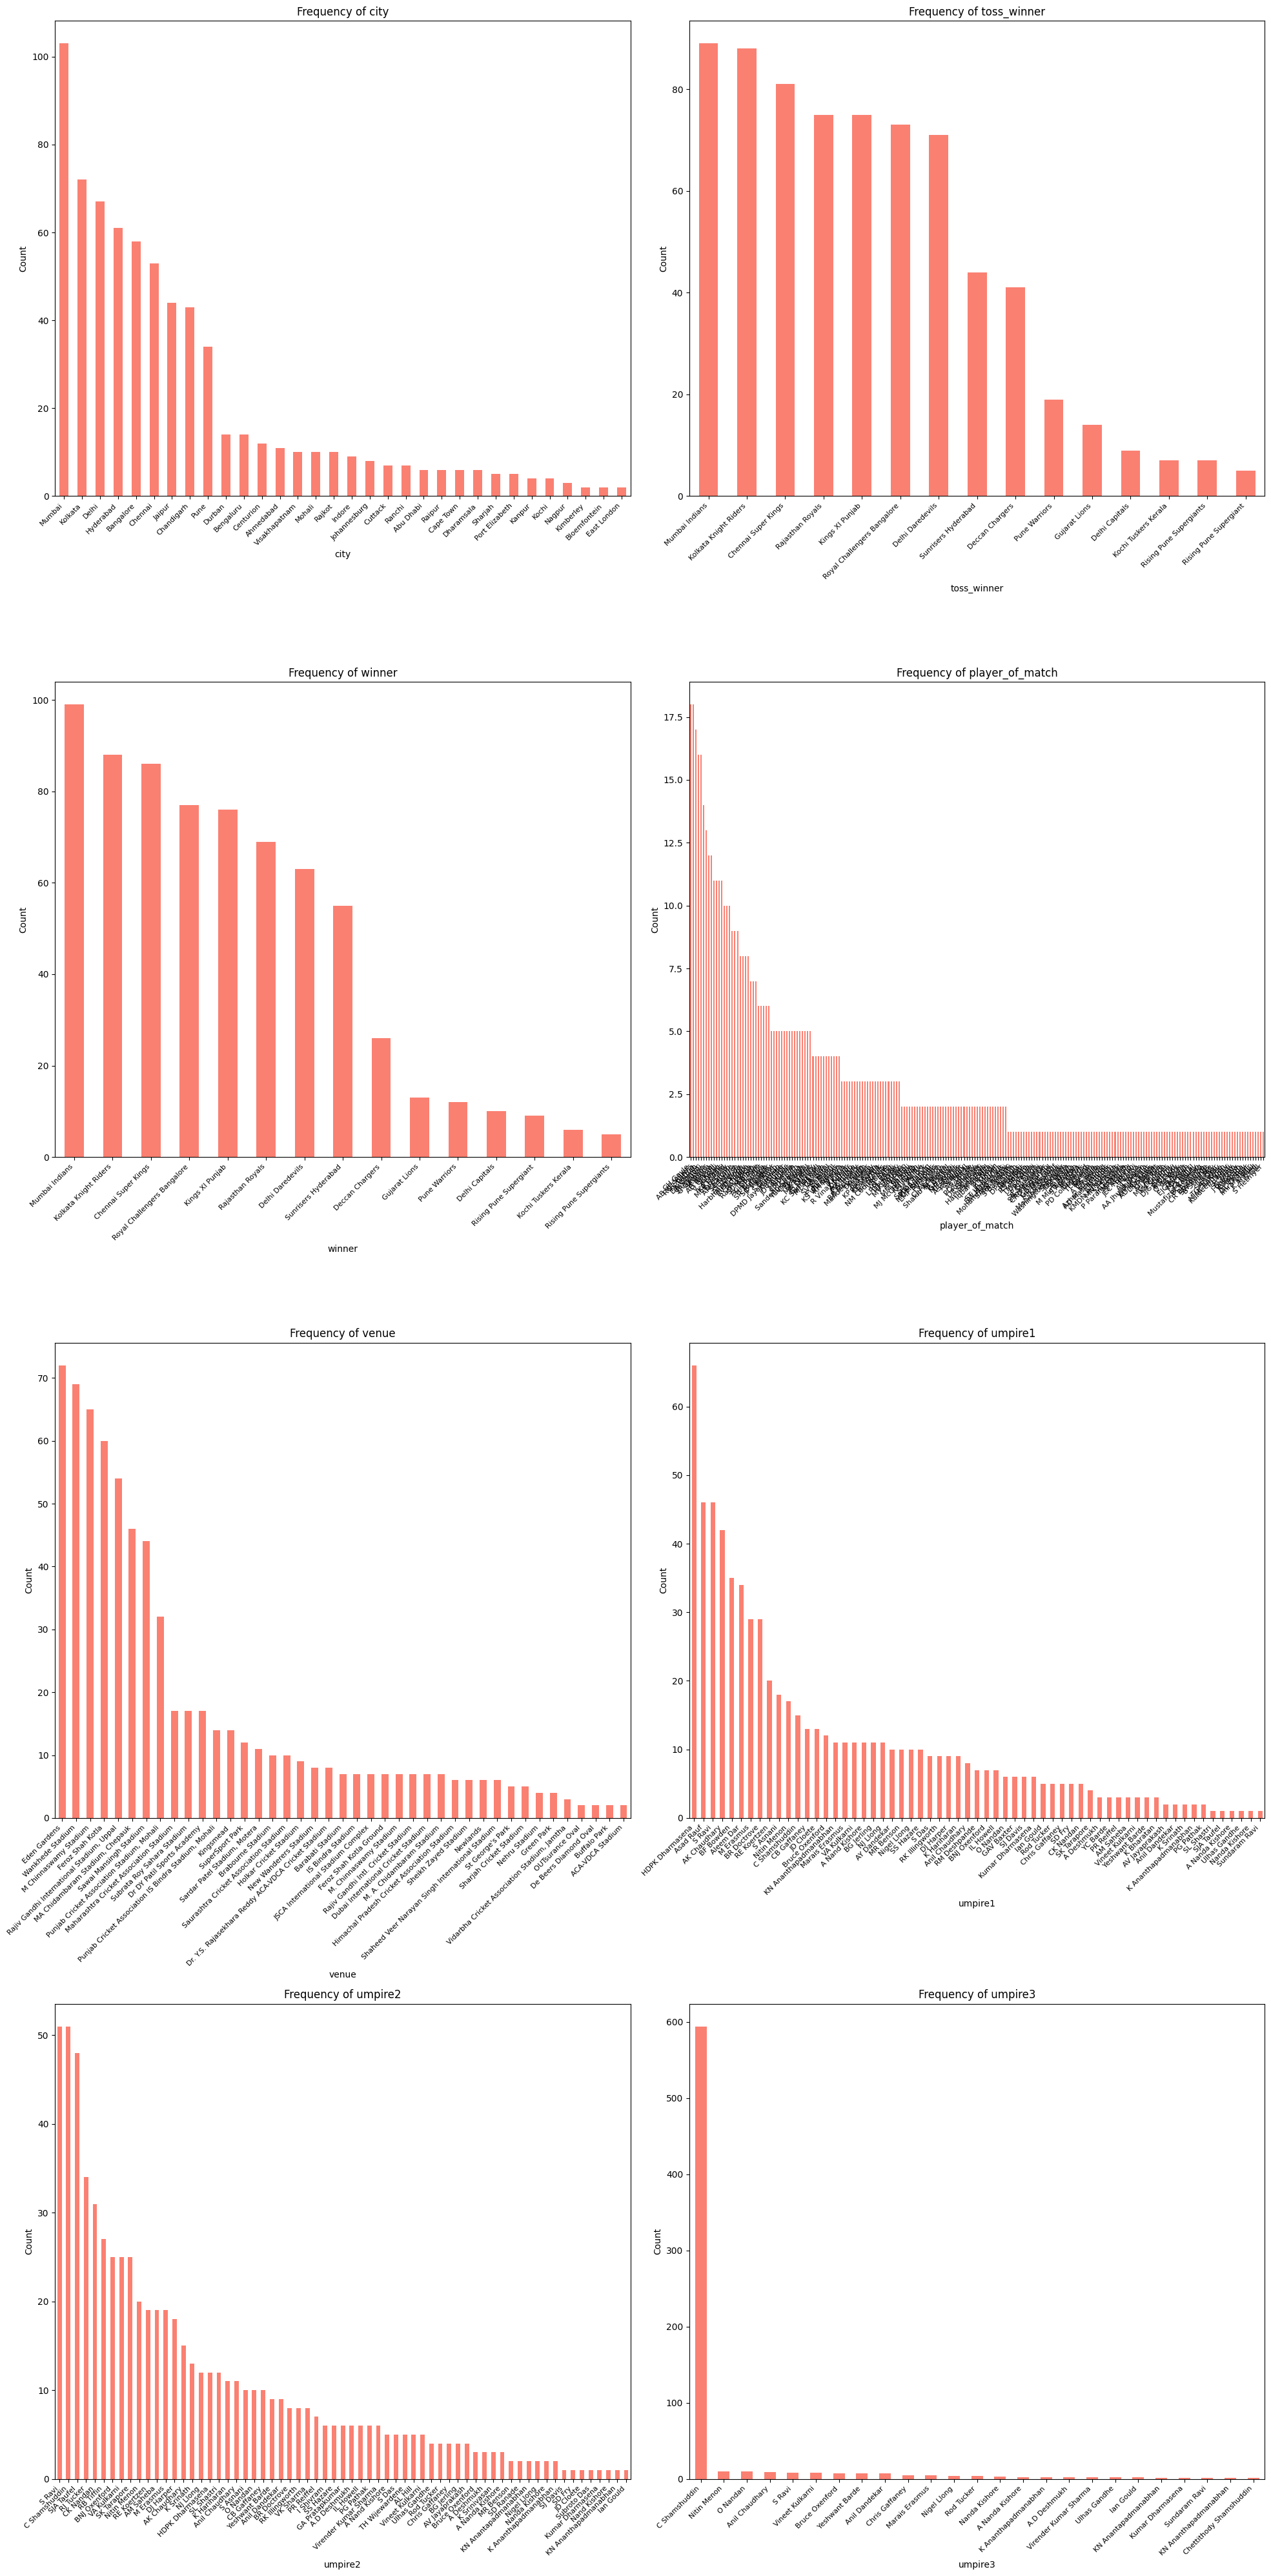

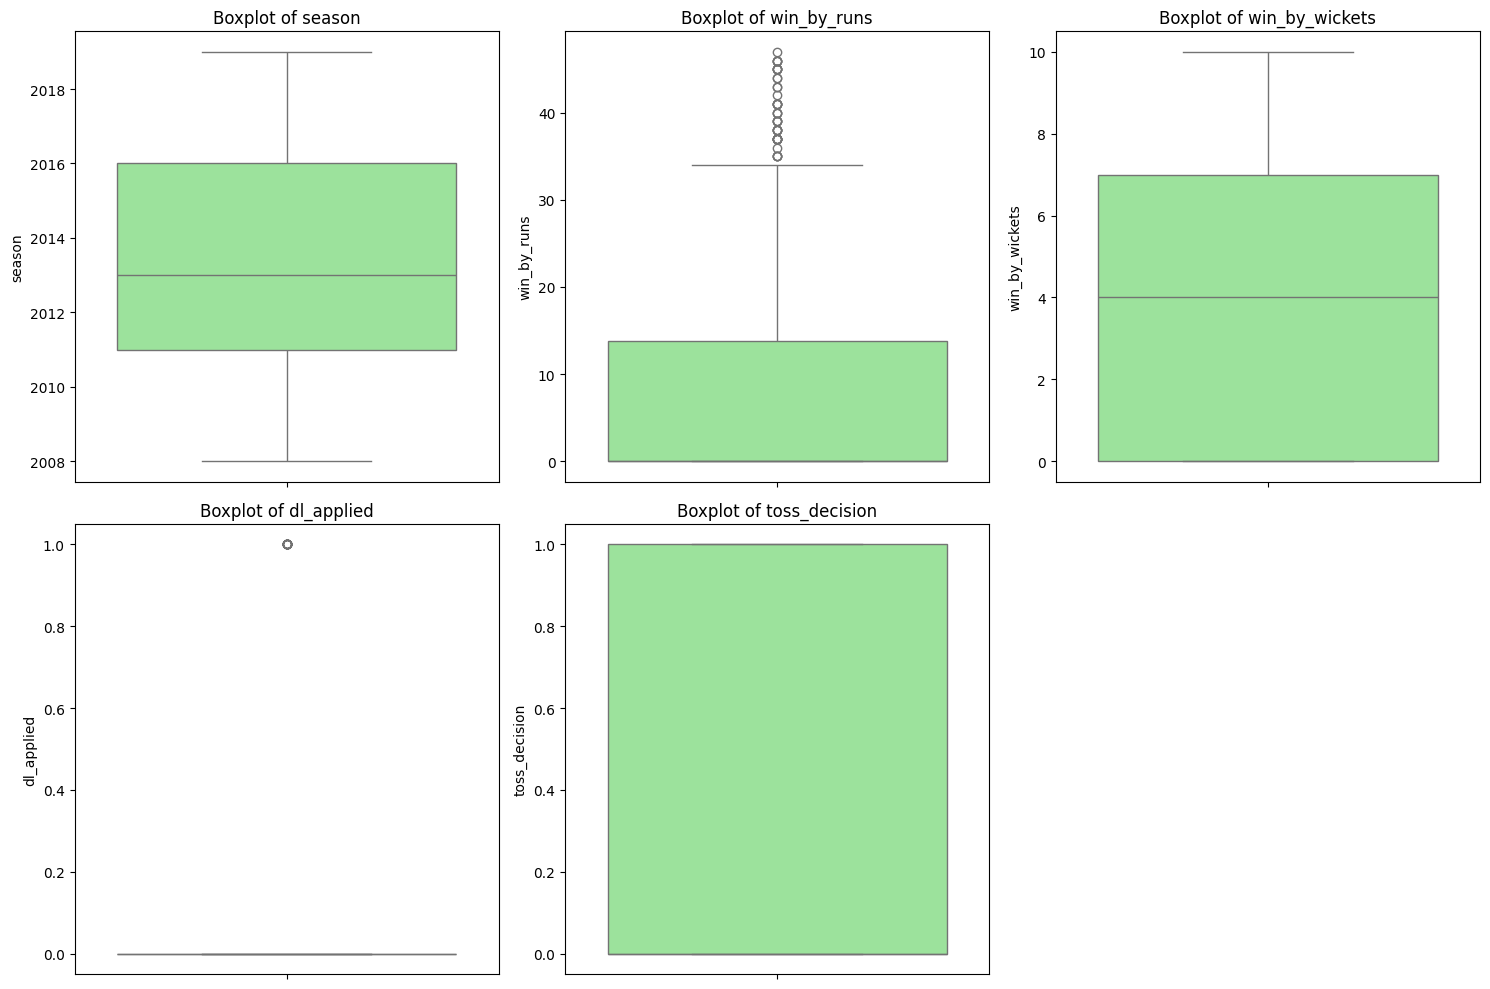

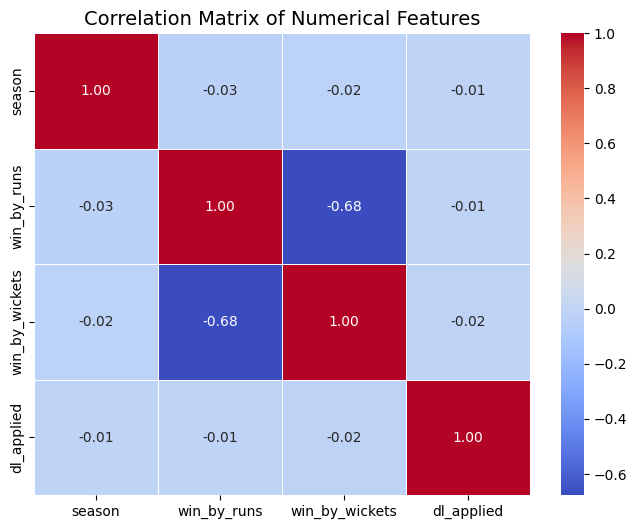

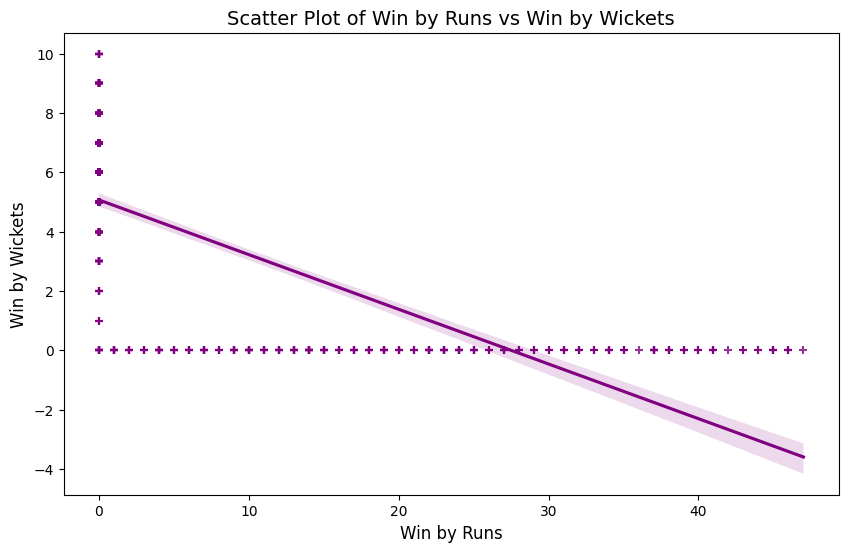

C:\Users\thiru\AppData\Local\Temp\ipykernel_13280\1592624068.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='win_by_runs', data=df, palette='Set3')


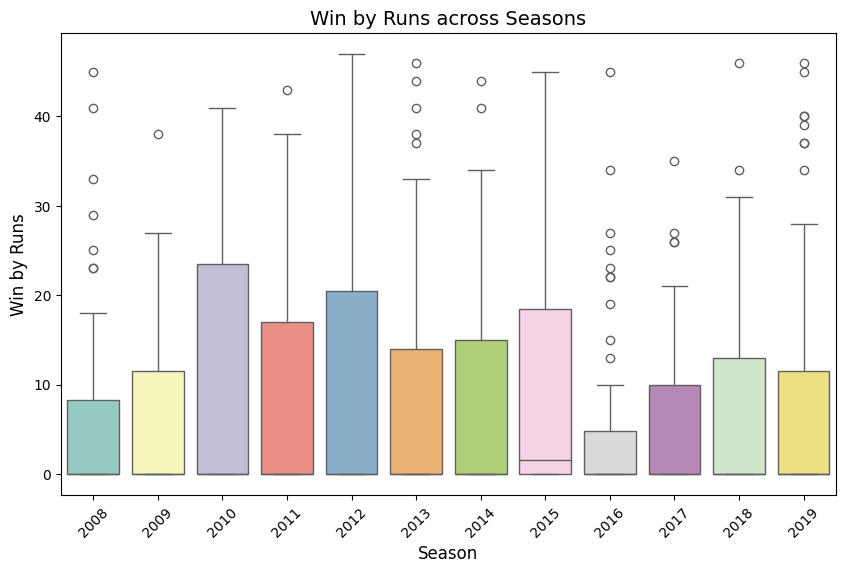

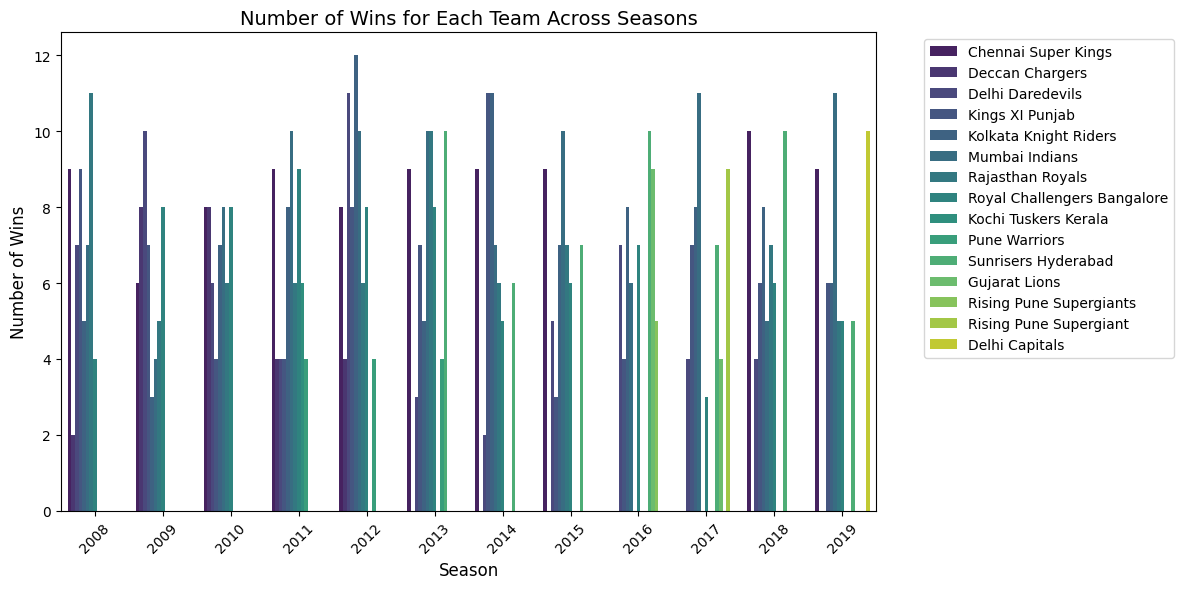

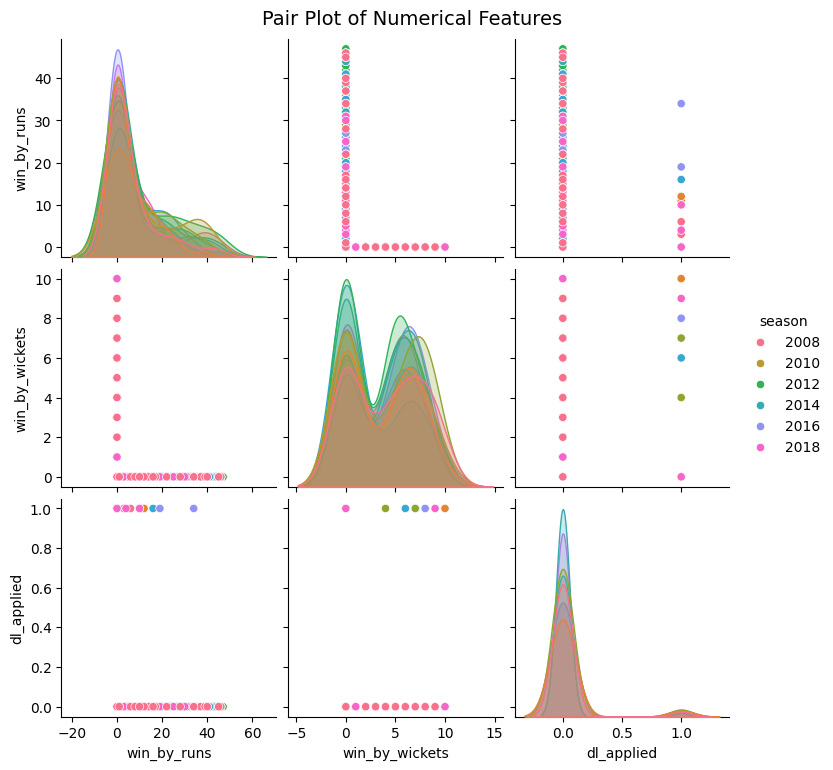

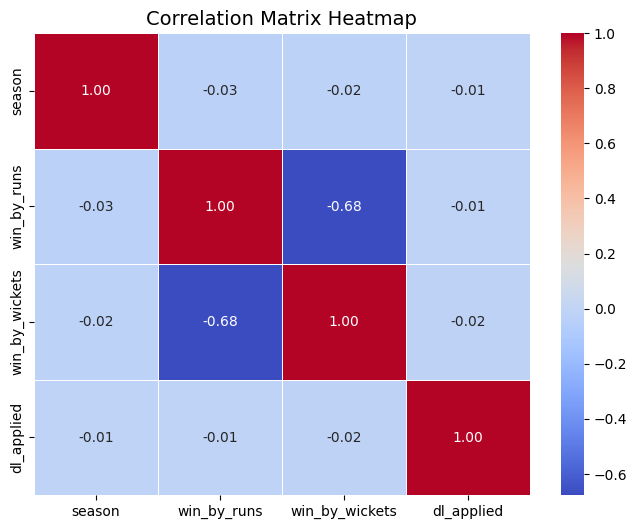

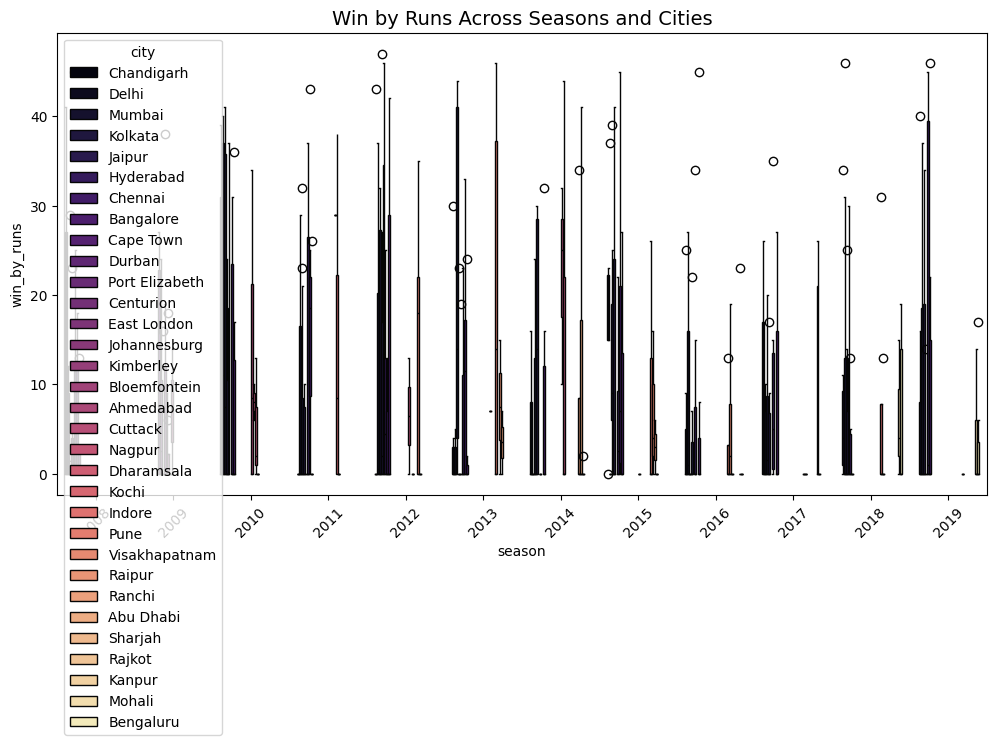

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Visualizations
plt.figure(figsize=(15, 10))
numerical_cols = ['season', 'win_by_runs', 'win_by_wickets', 'dl_applied', 'toss_decision']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

categorical_cols = ['city', 'toss_winner', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']
plt.figure(figsize=(20, 40))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i + 1)
    df[col].value_counts().plot(kind='bar', color='salmon')
    plt.title(f'Frequency of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel(col, fontsize=10)
plt.tight_layout()
plt.show()

# Bivariate Visualizations
numerical_cols = ['season', 'win_by_runs', 'win_by_wickets', 'dl_applied']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='win_by_runs', y='win_by_wickets', data=df, color='purple', marker='+')
plt.title('Scatter Plot of Win by Runs vs Win by Wickets', fontsize=14)
plt.xlabel('Win by Runs', fontsize=12)
plt.ylabel('Win by Wickets', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='win_by_runs', data=df, palette='Set3')
plt.title('Win by Runs across Seasons', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Win by Runs', fontsize=12)
plt.xticks(rotation=45)
plt.show()

team_wins_by_season = df.groupby(['season', 'winner'])['id'].count().reset_index(name='wins')
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='wins', hue='winner', data=team_wins_by_season, palette='viridis')
plt.title('Number of Wins for Each Team Across Seasons', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Multivariate Visualizations
sns.pairplot(df[numerical_cols], hue='season', palette='husl')
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=14)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='win_by_runs', hue='city', data=df, palette='magma')
plt.title('Win by Runs Across Seasons and Cities', fontsize=14)
plt.xticks(rotation=45)
plt.show()